In [101]:
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from  nltk.tokenize import TweetTokenizer

## import train and test data

In [102]:
train=pd.read_csv('D:\\DataScience\\Datasets\\Twitter_NLP\\train_2kmZucJ.csv')
test=pd.read_csv('D:\\DataScience\\Datasets\\Twitter_NLP\\test_oJQbWVk.csv')

In [103]:
print('Shape of Train ',train.shape)

train.head()



Shape of Train  (7920, 3)


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [104]:
test.shape

(1953, 2)

In [123]:
combi=pd.concat([train,test])
combi.reset_index(drop=True)

combi=combi.drop(columns=['id'])
combi.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(9873, 2)

In [124]:
combi.head()

,label,tweet
0,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0.0,Finally a transparant silicon case ^^ Thanks t...
2,0.0,We love this! Would you go? #talk #makememorie...
3,0.0,I'm wired I know I'm George I was made that wa...
4,1.0,What amazing service! Apple won't even talk to...


In [125]:
import re
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    
    for i in r:
        input_text=re.sub(i,'',input_text)
        
    return input_text

In [169]:
combi['cleantweet']=combi['tweet'].apply(remove_pattern,args=('@[\w]*',)) #remove user tags
urlpattern='http[s]?[://\d\w.%-]+'
combi['cleantweet']=combi['cleantweet'].apply(remove_pattern,args=(urlpattern,)) # remove url

In [212]:
combi.head(10)

,label,tweet,cleantweet
0,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnancy test #android #apps #b...
1,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,0.0,We love this! Would you go? #talk #makememorie...,love this would you #talk #makememories #unplu...
3,0.0,I'm wired I know I'm George I was made that wa...,wired know george was made that way #iphone #c...
4,1.0,What amazing service! Apple won't even talk to...,what amazing service apple won even talk about...
5,1.0,iPhone software update fucked up my phone big ...,iphone software update fucked phone big time s...
6,0.0,Happy for us .. #instapic #instadaily #us #son...,happy for #instapic #instadaily #us #sony #xpe...
7,0.0,New Type C charger cable #UK http://www.ebay.c...,new type charger cable #uk #bay #amazon #etsy ...
8,0.0,Bout to go shopping again listening to music #...,bout shopping again listening music #iphone #j...
9,0.0,Photo: #fun #selfie #pool #water #sony #camera...,photo #fun #selfie #pool #water #sony #camera ...


In [209]:
# remove puncations
nlp=spacy.load('en')

combi['cleantweet']=combi['cleantweet'].str.replace("[^a-zA-Z#]"," ")
combi['cleantweet']=combi['cleantweet'].str.lower()

#remove words less than 4 characters
combi['cleantweet']=combi['cleantweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))
combi['cleantweet'][0:10]

0    #fingerprint #pregnancy test #android #apps #b...
1    finally transparant silicon case thanks uncle ...
2    love this would you #talk #makememories #unplu...
3    wired know george was made that way #iphone #c...
4    what amazing service apple won even talk about...
5    iphone software update fucked phone big time s...
6    happy for #instapic #instadaily #us #sony #xpe...
7    new type charger cable #uk #bay #amazon #etsy ...
8    bout shopping again listening music #iphone #j...
9    photo #fun #selfie #pool #water #sony #camera ...
Name: cleantweet, dtype: object

In [213]:


tweet_tokenize=TweetTokenizer()

# tweet_tokenize(combi['cleantweet'][0])
#lemmatize using spacy
combi['cleantweet']=combi['cleantweet'].apply(lambda x:' '.join([token for token in tweet_tokenize.tokenize(x)]))
combi['cleantweet'][0:10]

0    #fingerprint #pregnancy test #android #apps #b...
1    finally transparant silicon case thanks uncle ...
2    love this would you #talk #makememories #unplu...
3    wired know george was made that way #iphone #c...
4    what amazing service apple won even talk about...
5    iphone software update fucked phone big time s...
6    happy for #instapic #instadaily #us #sony #xpe...
7    new type charger cable #uk #bay #amazon #etsy ...
8    bout shopping again listening music #iphone #j...
9    photo #fun #selfie #pool #water #sony #camera ...
Name: cleantweet, dtype: object

#fingerpri


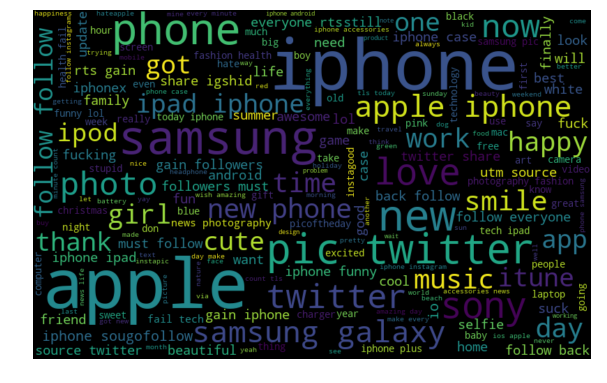

In [220]:
#word cloud

allwords= ' '.join(text for text in combi['cleantweet'])

from wordcloud import WordCloud
from PIL import Image
import numpy as np

print(allwords[0:10])

a = nltk.FreqDist(allwords)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d.head()
# round_mask=np.array(Image.open('D:\\DataScience\\NLP\\roundshape.jpg'))
wordcloud=WordCloud(width=800,height=500,random_state=1,max_font_size=100).generate(allwords)

%matplotlib inline

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [206]:
#extract all hashtags

def extract_hashtag(x):
    hashtags=[]
    print(x.size)
#     tag2=re.search(r'#(\w)+)',x[0])
#     print(x[0])
    for i in x:
        tag=re.findall(r"#(\w+)",i.lower())
        hashtags.append(tag)
    return hashtags


In [198]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i.lower())
        hashtags.append(ht)

    return hashtags

In [207]:
# extracting hashtags from non racist/sexist tweets

HT_regular = extract_hashtag(combi['cleantweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = extract_hashtag(combi['cleantweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

5894
2026


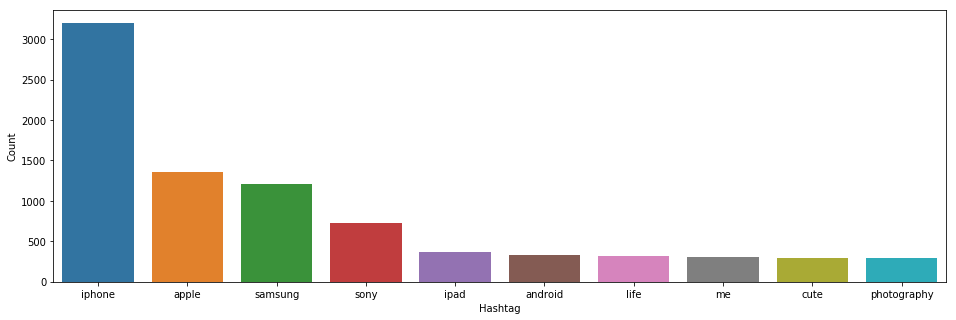

In [208]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [222]:
#model building

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

bow=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')

bow_matrix=bow.fit_transform(combi['cleantweet'])
tfidf_matrix=tfidf.fit_transform(combi['cleantweet'])

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

train_bow=bow_matrix[:7920,:]
test_bow=bow_matrix[7920:,:]

train_tfidf=tfidf_matrix[:7920,:]
test_tfidf=tfidf_matrix[7920:,:]

X_train_bow,X_valid_bow,y_train_bow,y_valid_bow=train_test_split(train_bow,train['label'])
X_train_tfidf,X_valid_tfidf,y_train_tfidf,y_valid_tfidf=train_test_split(train_tfidf,train['label'])

lreg=LogisticRegression()
lreg.fit(X_train_bow,y_train_bow)

pred=lreg.predict(X_valid_bow)

pred_int_bow=pred>0.3

print('bow score',f1_score(y_valid_bow,pred_int_bow))

# using tfidf features

lreg.fit(X_train_tfidf,y_train_tfidf)
pred=lreg.predict(X_valid_tfidf)

test_pred=lreg.predict(test_tfidf)
print(test_pred.shape)
print('tf idf score',f1_score(y_valid_tfidf,pred_int_tfidf))
test['label']=test_pred

sumission=test[['id','label']]
sumission.to_csv('submission.csv',index=False)





bow score 0.743940990516333
(1953,)
tf idf score 0.25326633165829143


In [249]:
from sklearn.naive_bayes import MultinomialNB

mnb_model=MultinomialNB(alpha=0.3)

mnb_model.fit(X_train_tfidf,y_train_tfidf)

pred=mnb_model.predict(X_valid_tfidf)
pred_int_tfidf=pred>0.3
print('score with tf IDF and NaiveBayes',f1_score(y_valid_tfidf,pred_int_tfidf))


test_pred=mnb_model.predict(test_tfidf)

test['label']=test_pred>0.3

sumission=test[['id','label']]
sumission.to_csv('submission.csv',index=False)


score with tf IDF and NaiveBayes 0.7932960893854748


## XGBoost Classfier

In [243]:
from sklearn.ensemble import GradientBoostingClassifier 

xgbModel=GradientBoostingClassifier()

xgbModel.fit(X_train_tfidf,y_train_tfidf)

pred=xgbModel.predict(X_valid_tfidf)
pred_int_tfidf=pred>0.3
print('score with tf IDF and GradientBoost',f1_score(y_valid_tfidf,pred_int_tfidf))


score with tf IDF and NaiveBayes 0.5683192261185006


In [245]:
from sklearn.ensemble import RandomForestClassifier 

rfModel=RandomForestClassifier(n_estimators=10)

rfModel.fit(X_train_tfidf,y_train_tfidf)

pred=rfModel.predict(X_valid_tfidf)
pred_int_tfidf=pred>0.3
print('score with tf IDF and RandomForest',f1_score(y_valid_tfidf,pred_int_tfidf))

score with tf IDF and RandomForest 0.7296482412060302


In [248]:
from sklearn.tree import DecisionTreeClassifier 

dtModel=DecisionTreeClassifier()

dtModel.fit(X_train_tfidf,y_train_tfidf)

pred=dtModel.predict(X_valid_tfidf)
pred_int_tfidf=pred>0.3
print('score with tf IDF and RandomForest',f1_score(y_valid_tfidf,pred_int_tfidf))

score with tf IDF and RandomForest 0.6697588126159554
